## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL: https://arpitbajpai.weebly.com/seizure-detection-with-a-classifier.html


Arpit Bajpai
Full Time
TBA
Rafael


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import svm

Importing data and doing some basic exploration. 

In [2]:
df = pd.read_csv('epilipsy.csv')
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [3]:
df=df.drop('Unnamed: 0', axis=1)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [6]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,3.000000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,1.414275
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,1.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,2.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,3.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,4.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,5.000000


In [7]:
df.isna().sum().head()

X1    0
X2    0
X3    0
X4    0
X5    0
dtype: int64

In [8]:
unscaled_X= df.drop(['y'], axis=1)
unscaled_X.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,135,190,229,223,192,125,55,-9,-33,-38,...,8,-17,-15,-31,-77,-103,-127,-116,-83,-51
1,386,382,356,331,320,315,307,272,244,232,...,168,164,150,146,152,157,156,154,143,129
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,29,57,64,48,19,-12,-30,-35,-35,-36
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,10,4,2,-12,-32,-41,-65,-83,-89,-73


In [9]:
df1 = pd.read_csv('epilipsy.csv')
df1=df1.drop('Unnamed: 0', axis=1)
df1.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FAD7815940>,
      dtype=object)

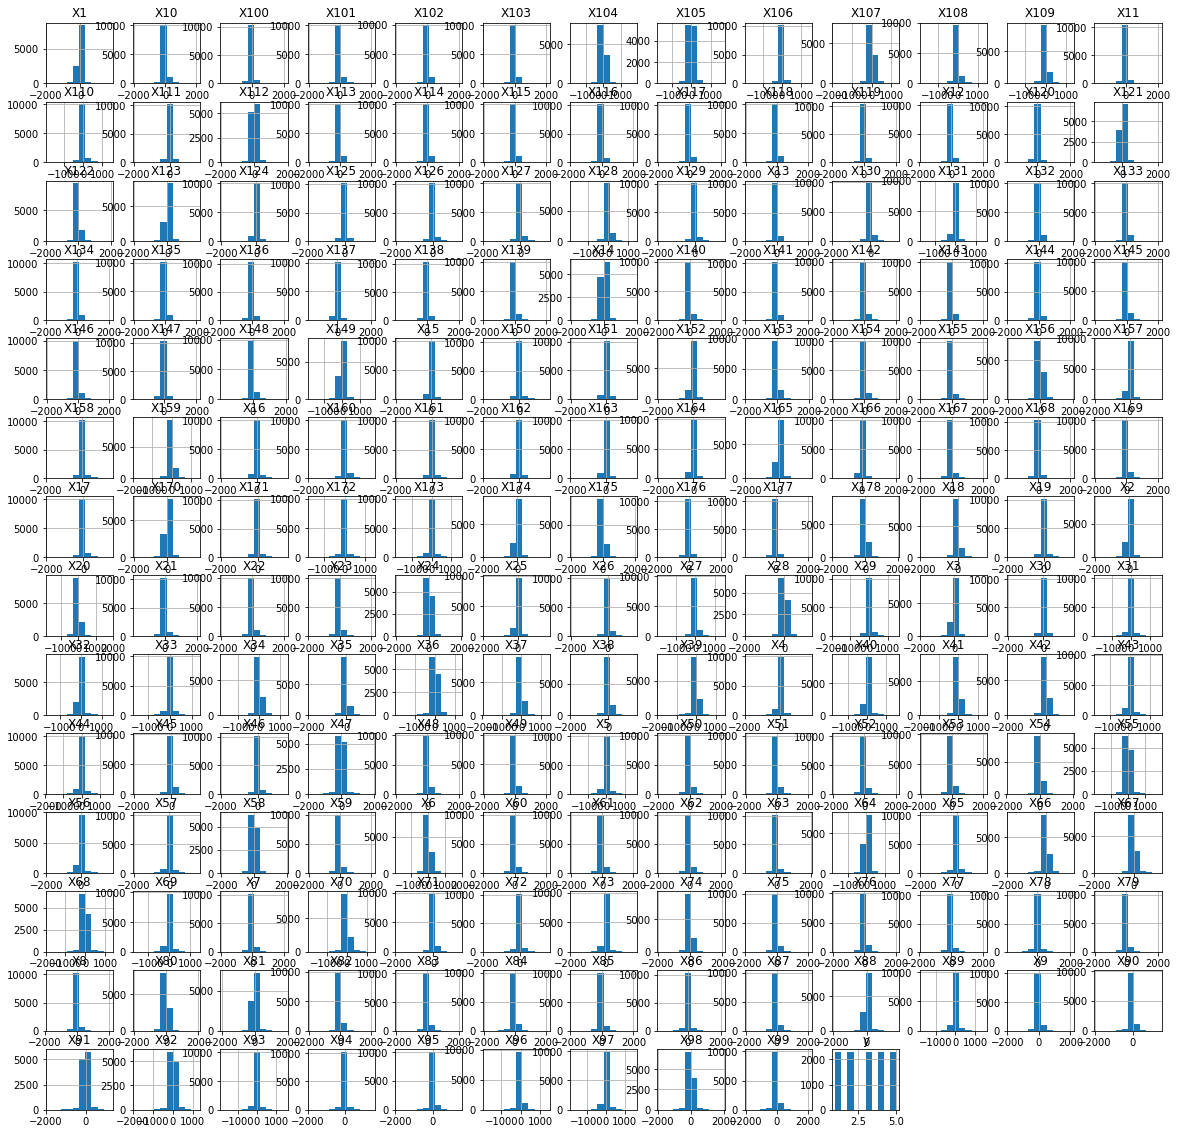

In [10]:
df1.hist(figsize=(20,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FADF52DB70>,
      dtype=object)

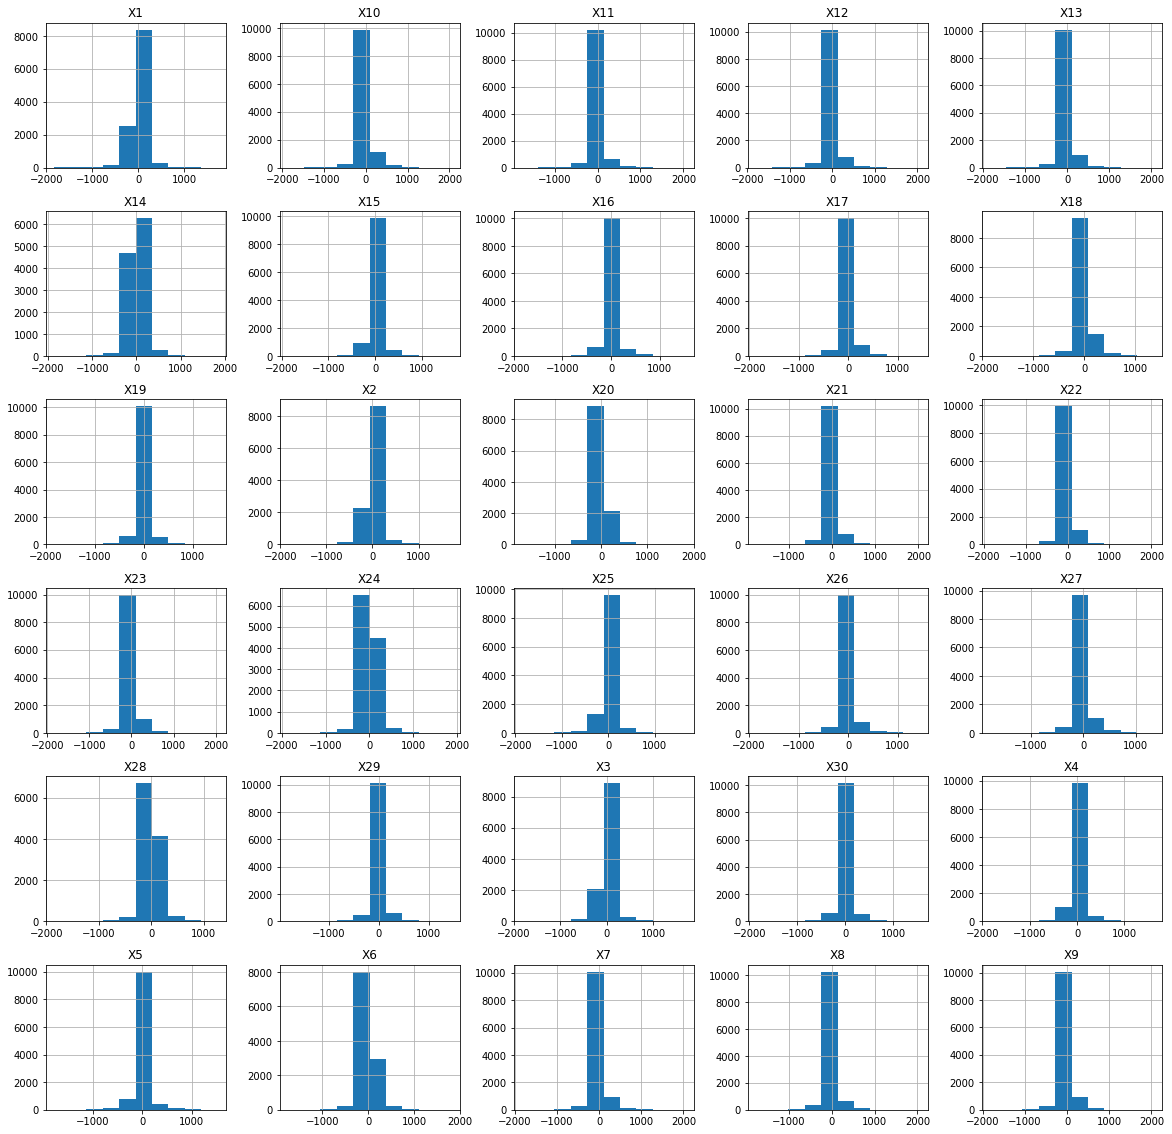

In [11]:
df1.loc[:,'X1':'X30'].hist(figsize=(20,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FADFCE2BE0>,
      dtype=object)

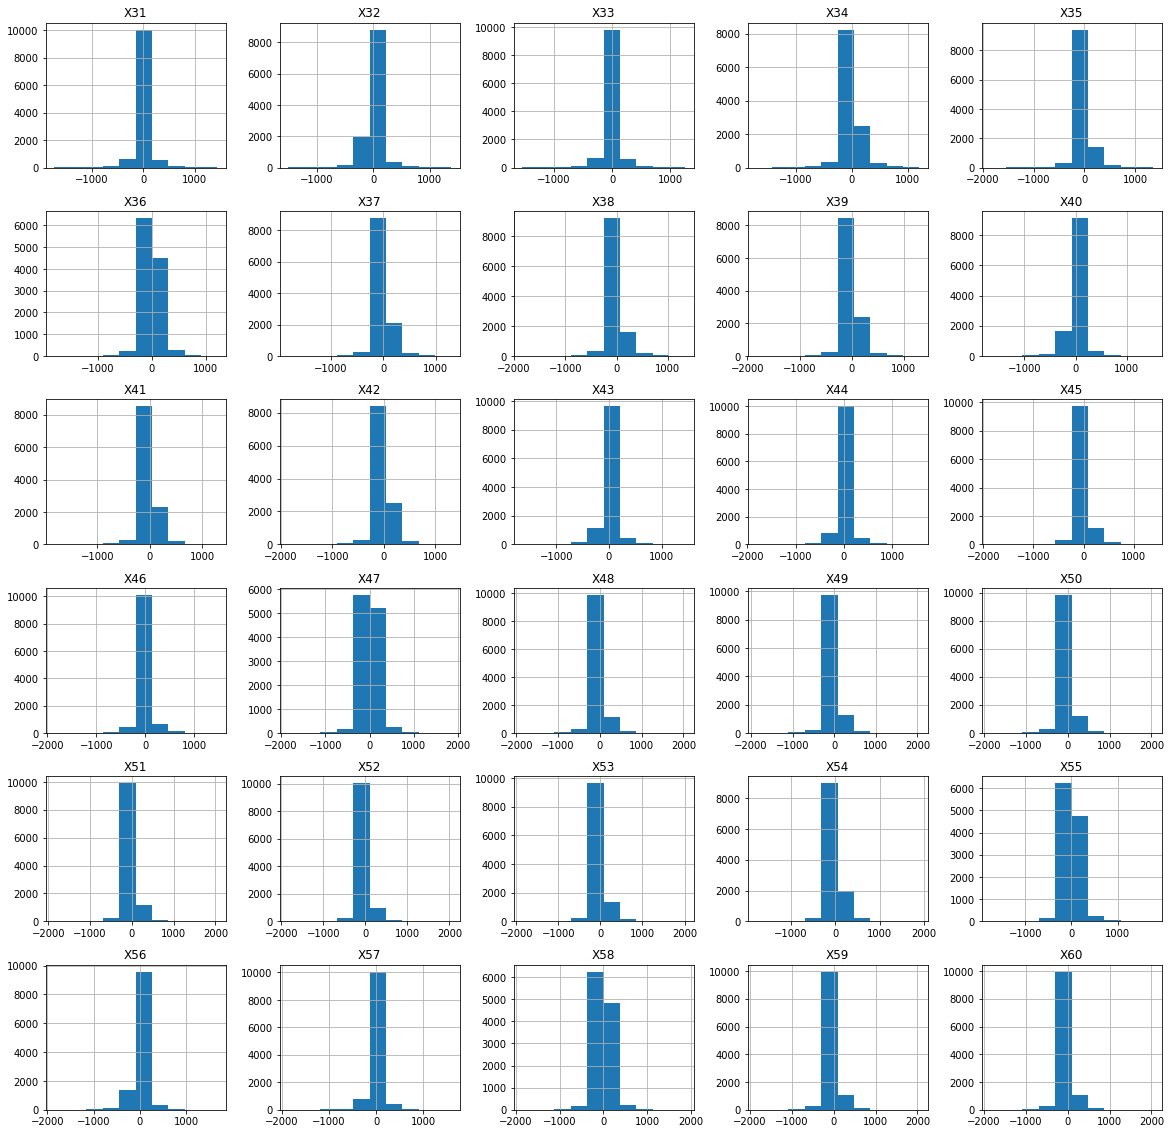

In [12]:
df1.loc[:,'X31':'X60'].hist(figsize=(20,20))

Almost all the data points appear to be centered closely around the mean. 

In [13]:
y = df['y']
y.head()

0    4
1    1
2    5
3    5
4    5
Name: y, dtype: int64

We have a range of values from 1 to 5 in our target value but we're only interested in 0 an 1 because they represent not having a seizure and having a seizure so let's replace everything that is not a 1 in our dataset with a zero to signify no seizure. 

In [14]:
for i in range(0, len(y)):
    if y[i]!= 1:
        y[i]=0
        

Let's scale our data to make it a bit more ML friendly. 

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X= scaler.fit_transform(unscaled_X)

C:\Users\xxtur\Anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\xxtur\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [16]:
X

array([[ 0.88505134,  1.20992878,  1.46276429, ..., -0.63414367,
        -0.43329036, -0.23539922],
       [ 2.40057718,  2.36619038,  2.23944096, ...,  1.02342937,
         0.95424076,  0.85653664],
       [-0.12328657, -0.16915405, -0.22513147, ..., -0.13687176,
        -0.13859348, -0.14440456],
       ...,
       [ 0.1544592 ,  0.10184476, -0.01720228, ...,  0.0657205 ,
         0.07015014,  0.02545213],
       [-0.17159018, -0.08484331,  0.00725997, ...,  0.49546166,
         0.43852123,  0.40762968],
       [ 0.24502848,  0.31262161,  0.41088722, ...,  0.0657205 ,
         0.08856869,  0.19530882]])

Let's split our data 

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.25)                               

In [18]:
X1_train, X2_test, y1_train, y2_test = train_test_split(X,y ,test_size=.25)

In [19]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
y=labelencoder_Y.fit_transform(y)

In [20]:
y

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

Let's run a simple Logistic Regression 

In [21]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

C:\Users\xxtur\Anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [22]:
preds = classifier.predict(X_test)

Before we can see our results, lets make a program to visualize our confusion_matrix

In [23]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, preds)

In [24]:
def show_cf(y_true, y_pred, class_names=None, model_name=None):
    cf = confusion_matrix(y_true, y_pred)
    plt.imshow(cf, cmap=plt.cm.Blues)
    
    if model_name:
        plt.title("Confusion Matrix: {}".format(model_name))
    else:
        plt.title("Confusion Matrix")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    class_names = set(y_true)
    tick_marks = np.arange(len(class_names))
    if class_names:
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
    
    thresh = cf.max() / 2.
    
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, cf[i, j], horizontalalignment='center', color='white' if cf[i, j] > thresh else 'black')

    plt.colorbar()

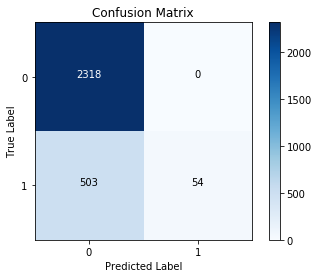

In [25]:
show_cf(y_test, preds)

We seem to be able to predict a non seizure pretty effectively but seizure prediction, our main goal is very poor, we must find a better model than this!. 

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [27]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90      2318
           1       1.00      0.10      0.18       557

   micro avg       0.83      0.83      0.83      2875
   macro avg       0.91      0.55      0.54      2875
weighted avg       0.86      0.83      0.76      2875



In [28]:
print(accuracy_score(y_test, preds))

0.8250434782608695


Let's try creating a Decision Tree Classifier and see if it serves us any better. 

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
tree_clf = DecisionTreeClassifier(criterion = 'gini', max_depth=5)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [30]:
tree_pred = tree_clf.predict(X_test)

In [31]:
print(classification_report(y_test, tree_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      2318
           1       0.88      0.71      0.78       557

   micro avg       0.92      0.92      0.92      2875
   macro avg       0.90      0.84      0.87      2875
weighted avg       0.92      0.92      0.92      2875



This one seems to be able to predict the seizures much better and the accuracy score apppears to increase significantly as well. 

In [32]:
print(accuracy_score(y_test, tree_pred))

0.9241739130434783


In [33]:
from sklearn.model_selection import cross_val_score

In [34]:
dt_cv_score = cross_val_score(tree_clf, X_test, y_test, cv=5)
mean_dt_cv = np.mean(dt_cv_score)
mean_dt_cv

0.9189569341345587

In [35]:
unscaled_X.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,135,190,229,223,192,125,55,-9,-33,-38,...,8,-17,-15,-31,-77,-103,-127,-116,-83,-51
1,386,382,356,331,320,315,307,272,244,232,...,168,164,150,146,152,157,156,154,143,129
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,29,57,64,48,19,-12,-30,-35,-35,-36
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,10,4,2,-12,-32,-41,-65,-83,-89,-73


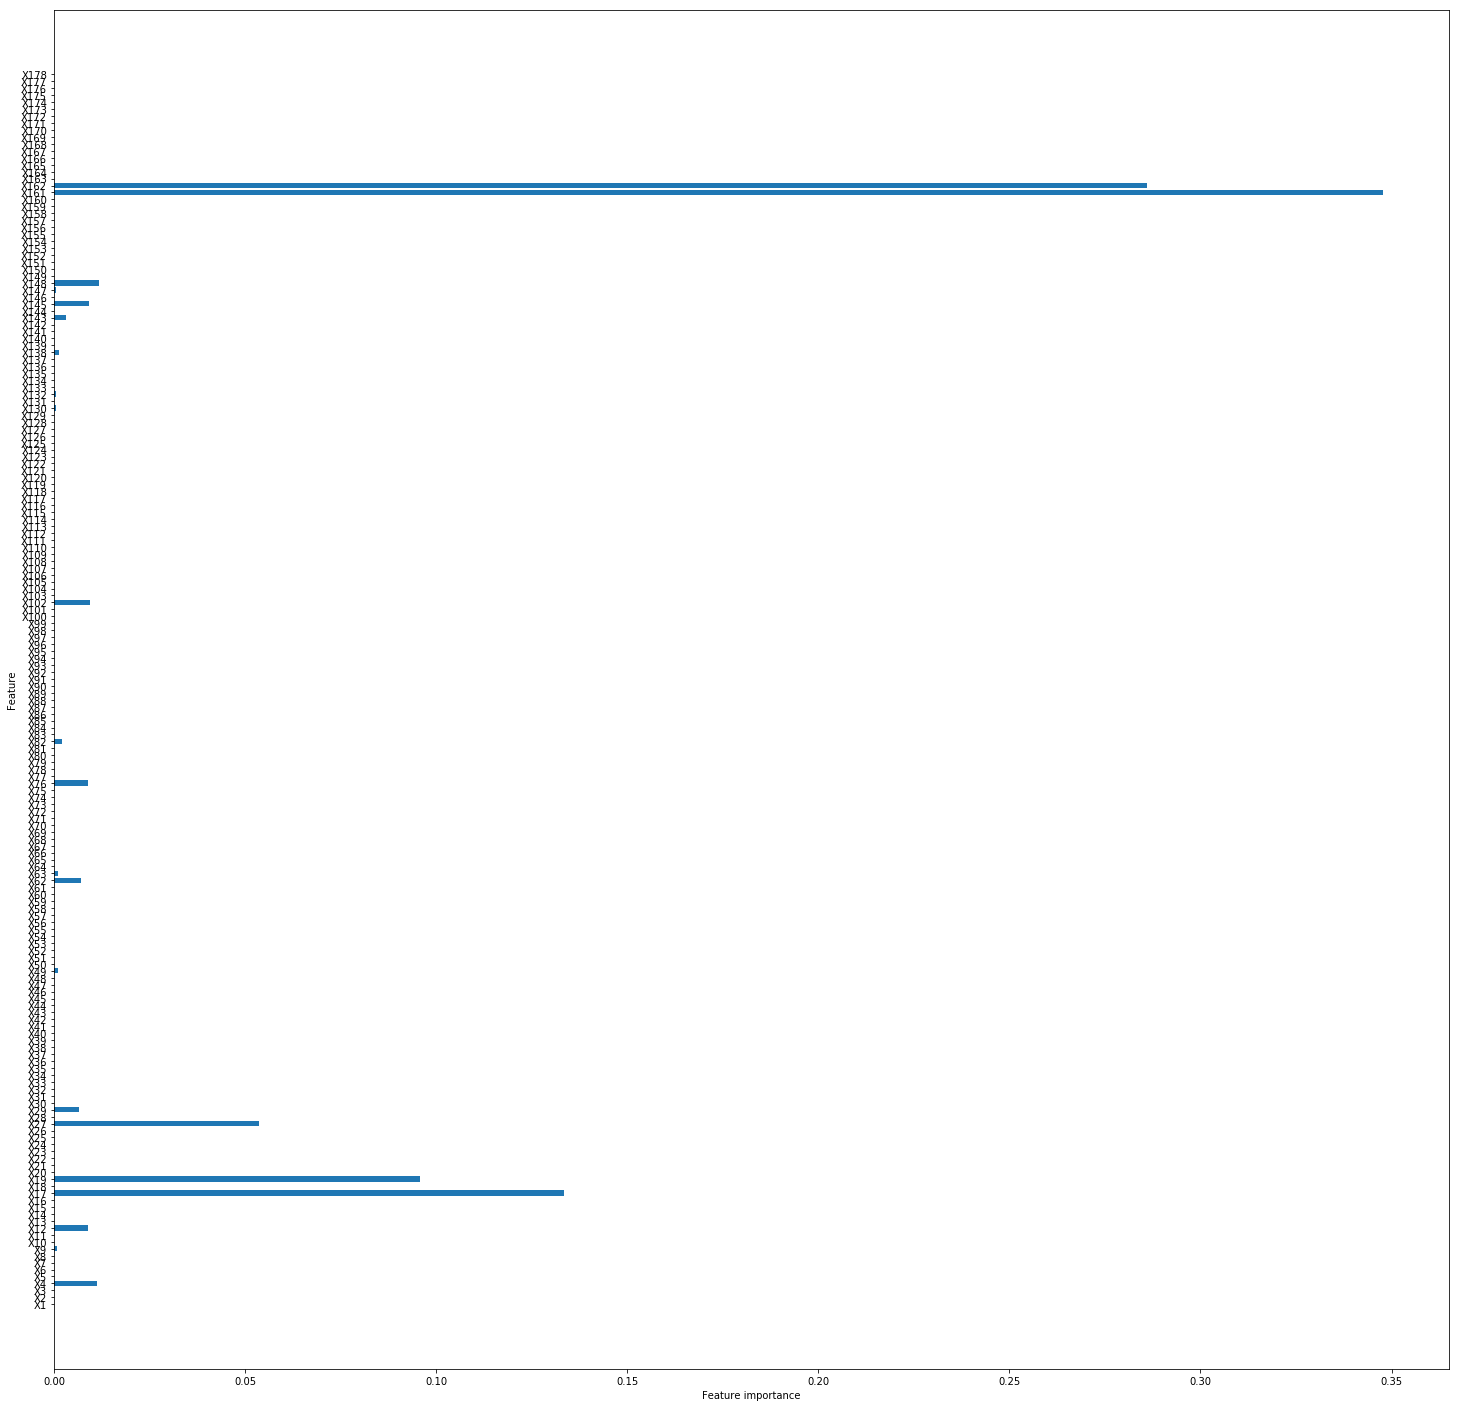

In [36]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(25,25))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), unscaled_X.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances(tree_clf)

In [37]:
tree_pred = tree_clf.predict(X_test)
print(confusion_matrix(y_test, tree_pred))
print(classification_report(y_test, tree_pred))

[[2262   56]
 [ 162  395]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      2318
           1       0.88      0.71      0.78       557

   micro avg       0.92      0.92      0.92      2875
   macro avg       0.90      0.84      0.87      2875
weighted avg       0.92      0.92      0.92      2875



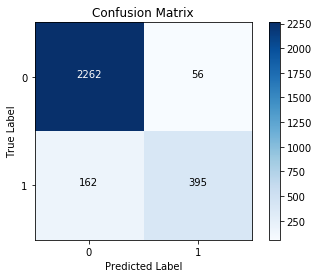

In [38]:
show_cf(y_test, tree_pred)

In [39]:
tree_clf.score(X_test, y_test)

0.9241739130434783

Let's add Grid Search to our model. 

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

In [52]:
dt_grid_search = GridSearchCV(tree_clf, dt_param_grid, cv=3, return_train_score=True, scoring='precision' )
dt_grid_search.fit(X_train, y_train)
# scoring= Can optimize based on recall

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [None, 2, 3, 4, 5, 6], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='precision', verbose=0)

In [53]:
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])
dt_gs_testing_score = dt_grid_search.score(X_test, y_test)

print("Mean Training Score: {:.4}%".format(dt_gs_training_score * 100))
print("Mean Testing Score: {:.4}%".format(dt_gs_testing_score * 100))
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

Mean Training Score: 90.31%
Mean Testing Score: 90.93%
Best Parameter Combination Found During Grid Search:


{'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 2,
 'min_samples_split': 10}

In [62]:
tree_clf_grid = DecisionTreeClassifier(criterion = 'gini', max_depth=None, min_samples_leaf = 3, min_samples_split = 10)
tree_clf_grid.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [63]:
grid_preds = tree_clf_grid.predict(X_test)

In [64]:
print(confusion_matrix(y_test, grid_preds))
print(classification_report(y_test, grid_preds))

[[2229   89]
 [ 102  455]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2318
           1       0.84      0.82      0.83       557

   micro avg       0.93      0.93      0.93      2875
   macro avg       0.90      0.89      0.89      2875
weighted avg       0.93      0.93      0.93      2875



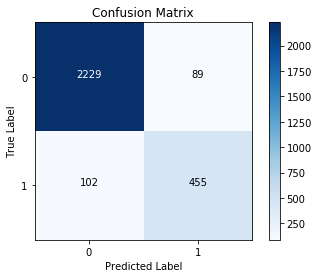

In [65]:
show_cf(y_test, grid_preds)

Our Recall and precision are increasing significantly. Let's make a bagging tree classifier.

In [66]:
accuracy_score(y_test, grid_preds)

0.9335652173913044

In [67]:
dt_cv_score = cross_val_score(tree_clf_grid, X_test, y_test, cv=3)
mean_dt_cv = np.mean(dt_cv_score)
mean_dt_cv

0.9356511430510928

In [68]:
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), n_estimators=20)
bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=20, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [69]:
bagged_pred = bagged_tree.predict(X_test)

In [70]:
accuracy_score(y_test, bagged_pred)

0.951304347826087

In [71]:
print(confusion_matrix(y_test, bagged_pred))
print(classification_report(y_test, bagged_pred))

[[2306   12]
 [ 128  429]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2318
           1       0.97      0.77      0.86       557

   micro avg       0.95      0.95      0.95      2875
   macro avg       0.96      0.88      0.92      2875
weighted avg       0.95      0.95      0.95      2875



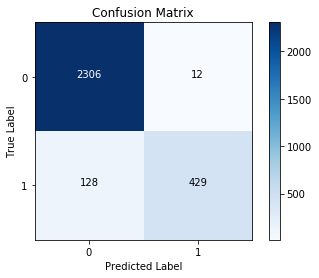

In [72]:
show_cf(y_test, bagged_pred)

All of our main values have increased significantly, but recall is still not where we want it to be. Let's try a random forest classifier. 

In [73]:
forest = RandomForestClassifier(n_estimators=100, max_depth=5)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [74]:
forest.score(X_train, y_train)

0.9528115942028985

In [75]:
forest.score(X_test, y_test)

0.9495652173913044

In [76]:
f_pred =forest.predict(X_test)

In [77]:
print(accuracy_score(f_pred, y_test))
print(confusion_matrix(y_test, f_pred))
print(classification_report(y_test, f_pred))

0.9495652173913044
[[2301   17]
 [ 128  429]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2318
           1       0.96      0.77      0.86       557

   micro avg       0.95      0.95      0.95      2875
   macro avg       0.95      0.88      0.91      2875
weighted avg       0.95      0.95      0.95      2875



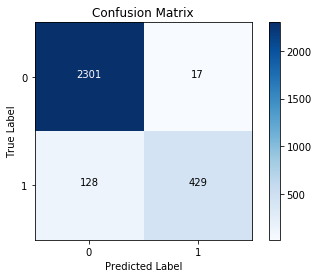

In [78]:
show_cf(y_test, f_pred)

Looks like we still nee to improve our predictor. We're still missing lots of siezures. Lets do Random Forest With Grid Search

In [79]:
mean_rf_cv_score = np.mean(cross_val_score(forest, X_test, y_test, cv=3))

print("Mean Cross Validation Score for Random Forest Classifier: {:.4}%".format(mean_rf_cv_score * 100))

Mean Cross Validation Score for Random Forest Classifier: 94.96%


In [80]:
rf_param_grid = {
    'n_estimators': [10,30,100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 6, 10],
    'min_samples_split': [5,10],
    'min_samples_leaf':[3,6]
}

In [117]:
import time
start = time.time()
rf_grid_search =GridSearchCV(forest, rf_param_grid, cv=3, scoring='precision')
rf_grid_search.fit(X_test, y_test)

print("Testing Accuracy: {:.4}%".format(rf_grid_search.best_score_ * 100))
print("Total Runtime for Grid Search on Random Forest Classifier: {:.4} seconds".format(time.time() - start))
print("")
print("Optimal Parameters: {}".format(rf_grid_search.best_params_))

Testing Accuracy: 98.59%
Total Runtime for Grid Search on Random Forest Classifier: 120.3 seconds

Optimal Parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 30}


In [118]:
grid_forest = RandomForestClassifier(criterion = 'gini', max_depth = None,min_samples_leaf=3, min_samples_split = 10, n_estimators=100)
grid_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [119]:
g_f_pred = grid_forest.predict(X_test)

In [120]:
print(accuracy_score(g_f_pred, y_test))
print(confusion_matrix(y_test, g_f_pred))
print(classification_report(y_test, g_f_pred))

0.9742608695652174
[[2288   30]
 [  44  513]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2318
           1       0.94      0.92      0.93       557

   micro avg       0.97      0.97      0.97      2875
   macro avg       0.96      0.95      0.96      2875
weighted avg       0.97      0.97      0.97      2875



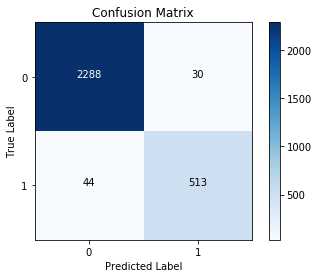

In [121]:
show_cf(y_test, g_f_pred)

This predictor is much more accurate with, grid forest, lets try to tune our parameters to work even bettter. 

In [122]:
from sklearn.cluster import KMeans

In [123]:
k_means_2 = KMeans(n_clusters=2).fit(X)
k_means_3 = KMeans(n_clusters=3).fit(X)
k_means_4 = KMeans(n_clusters=4).fit(X)
k_means_5 = KMeans(n_clusters=5).fit(X)
k_means_6 = KMeans(n_clusters=6).fit(X)
k_means_7 = KMeans(n_clusters=7).fit(X)

k_list = [k_means_2,k_means_3,k_means_4,k_means_5,k_means_6,k_means_7]

In [124]:
from sklearn.metrics import calinski_harabaz_score

In [125]:
CH_score = []
for i in k_list:
    label = i.labels_
    print(calinski_harabaz_score(X, label))
    CH_score.append(calinski_harabaz_score(X, label))


266.38524301239863
261.8050132550381
254.31126875121763
243.72617067320283
233.8303686993726
225.265809819769


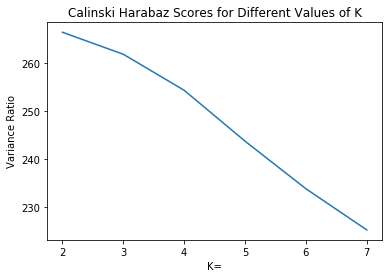

In [126]:
plt.plot([2,3, 4, 5, 6, 7], CH_score)
plt.xticks([2,3,4,5,6,7])
plt.title("Calinski Harabaz Scores for Different Values of K")
plt.ylabel("Variance Ratio")
plt.xlabel("K=")
plt.show()

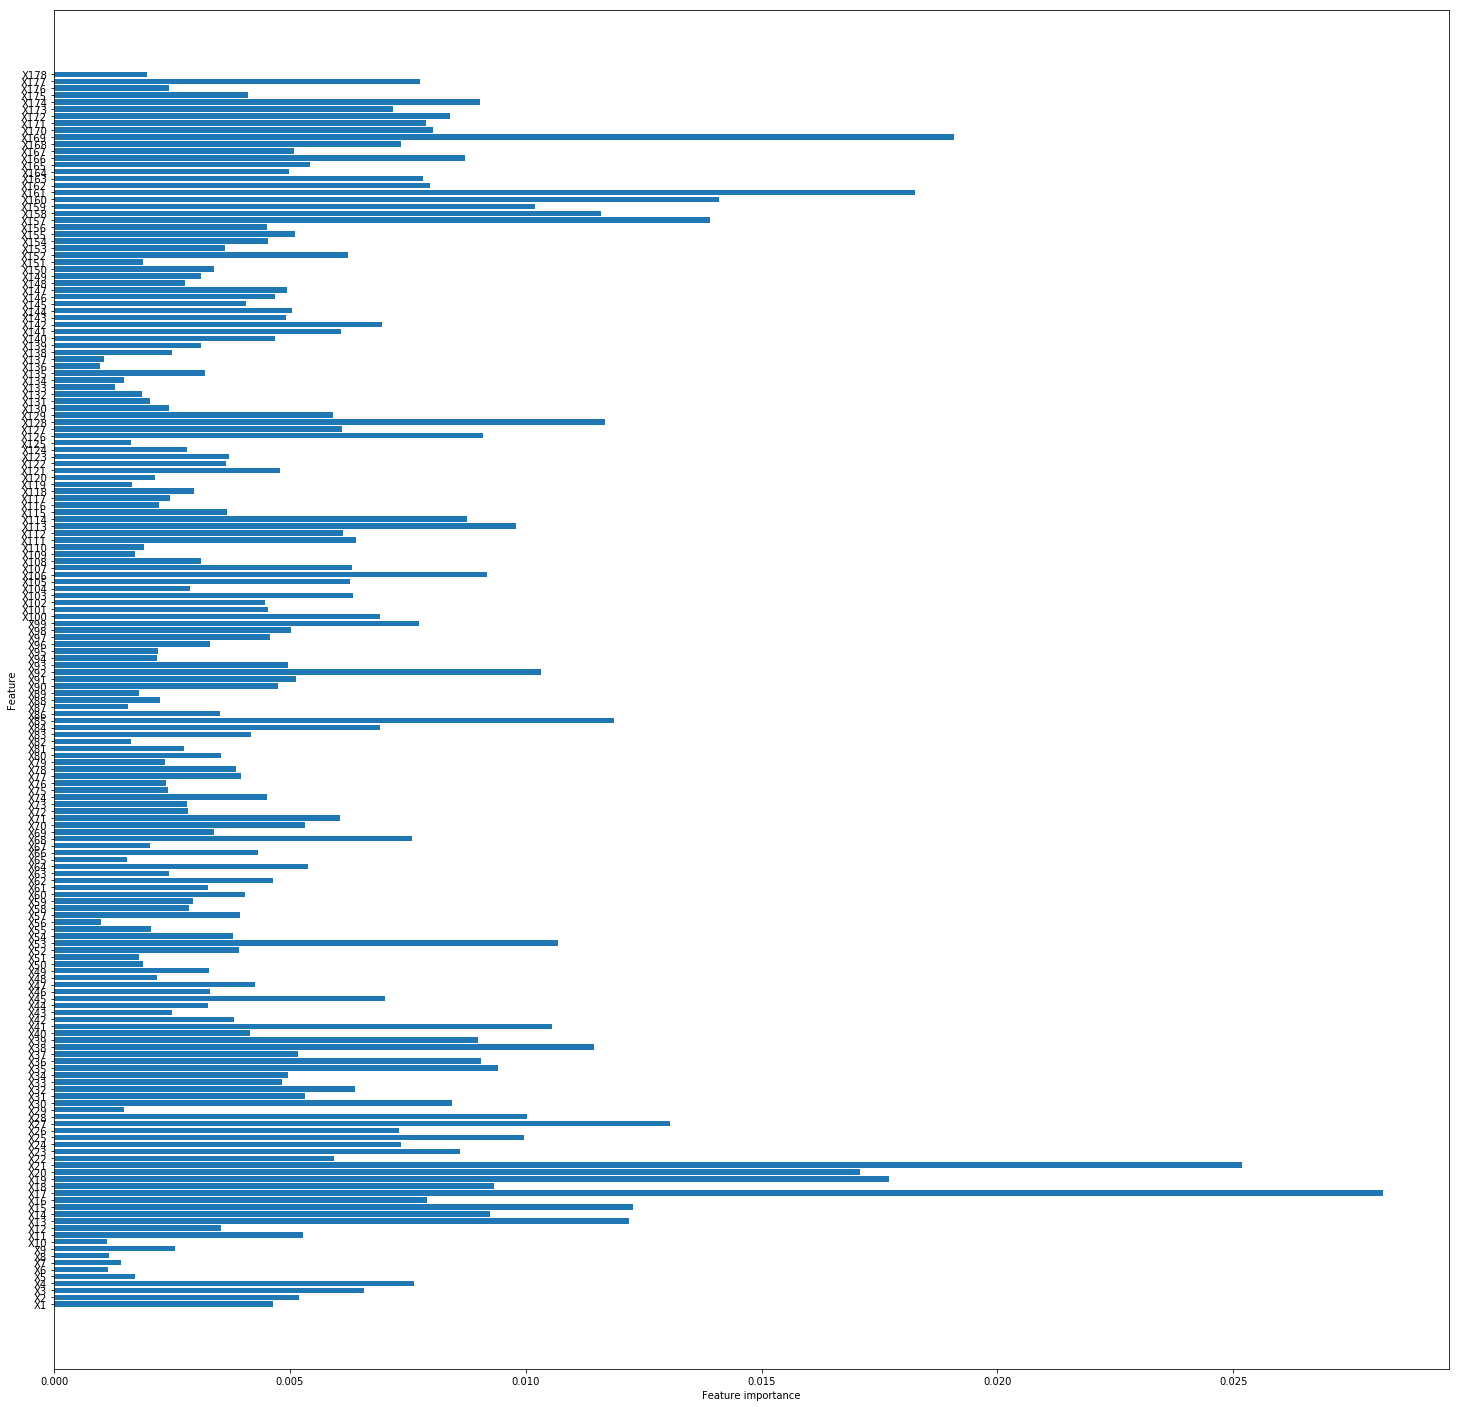

In [127]:
plot_feature_importances(grid_forest)

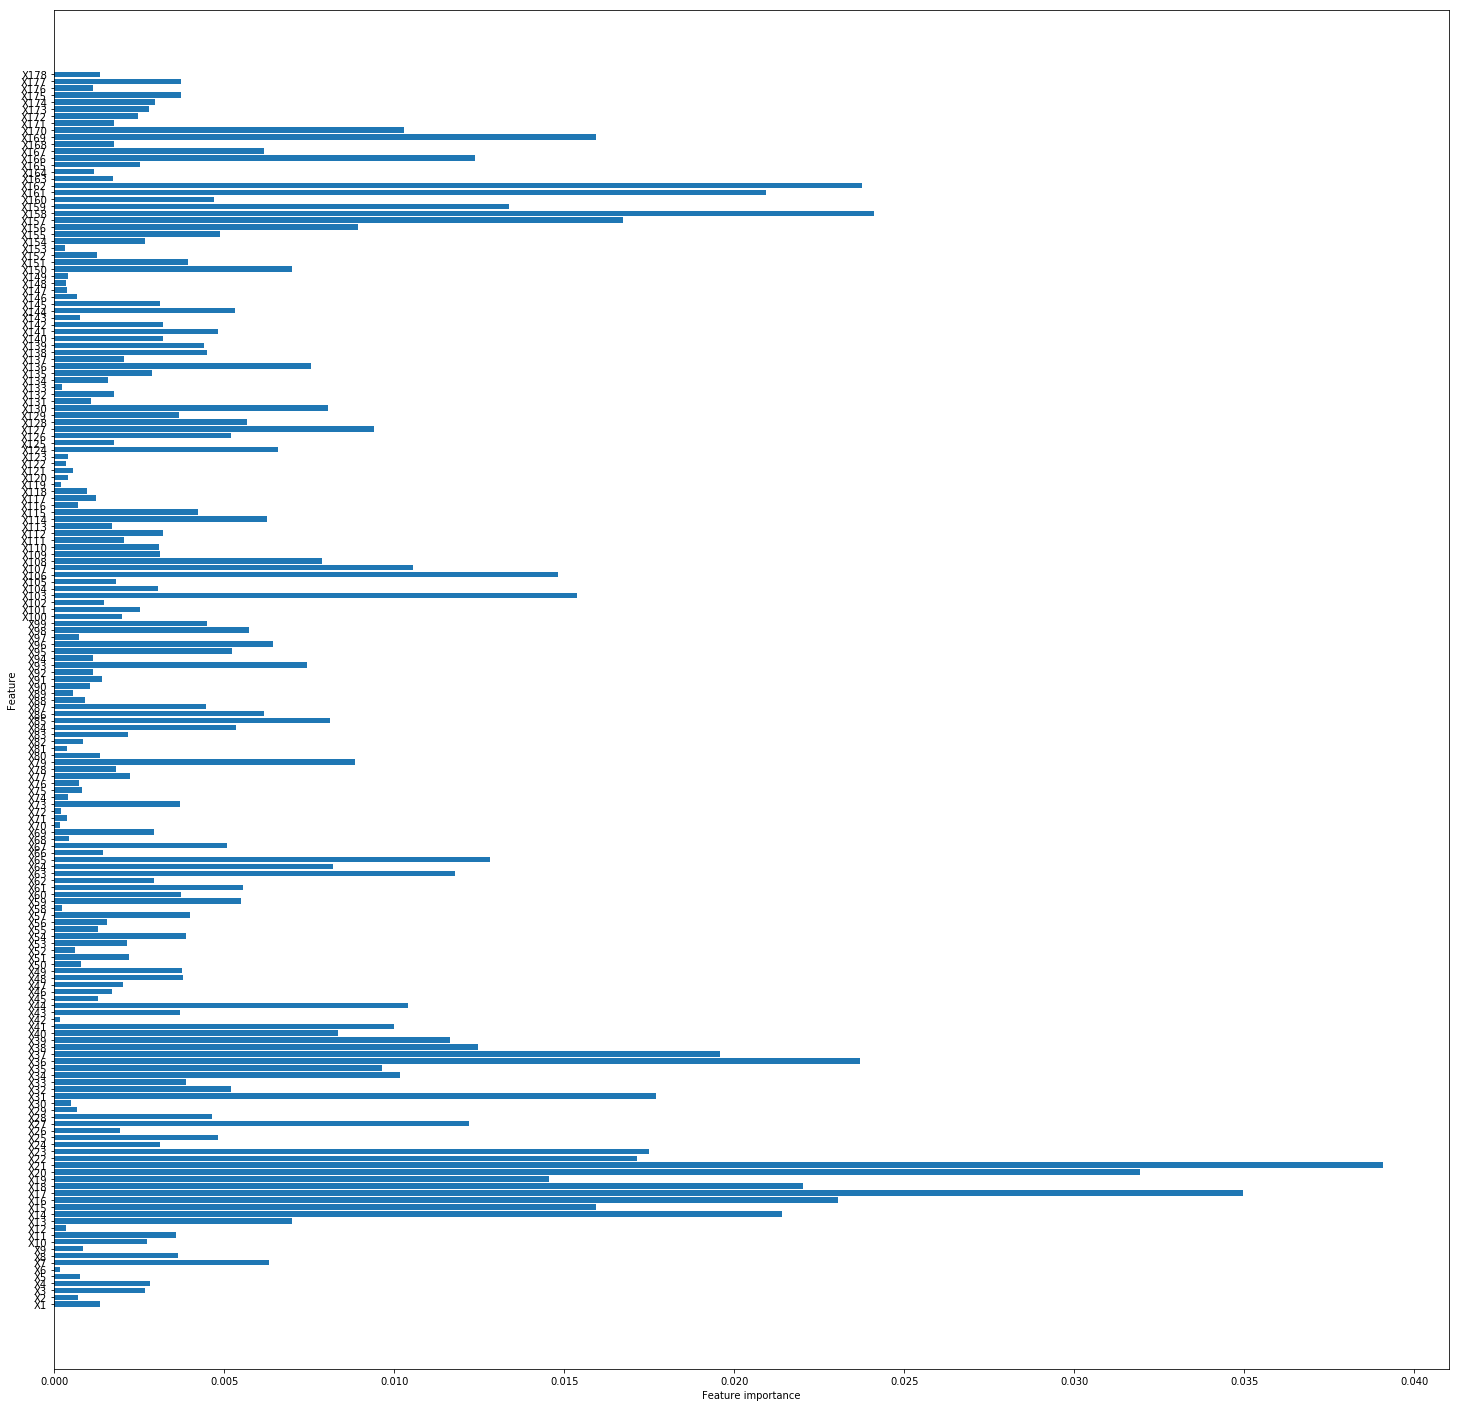

In [128]:
plot_feature_importances(forest)

In [130]:
forest.feature_importances_

array([0.00133728, 0.00070965, 0.00267893, 0.00282588, 0.0007442 ,
       0.00016686, 0.00632051, 0.0036451 , 0.00084566, 0.00273247,
       0.00357745, 0.0003575 , 0.00700341, 0.0213948 , 0.01594042,
       0.02304402, 0.03497182, 0.02202613, 0.01456396, 0.03192381,
       0.03907427, 0.01712691, 0.01748446, 0.00310783, 0.00481302,
       0.00193414, 0.01221169, 0.00463517, 0.00068137, 0.00048858,
       0.01768735, 0.00520918, 0.00386315, 0.01017757, 0.00965311,
       0.02370012, 0.01956726, 0.0124777 , 0.0116513 , 0.00835222,
       0.00998629, 0.00016761, 0.00371039, 0.01041241, 0.00128759,
       0.00171239, 0.00201208, 0.00378925, 0.00375741, 0.0007878 ,
       0.00219114, 0.00061655, 0.00214214, 0.00386864, 0.00129144,
       0.00156492, 0.00399845, 0.00024195, 0.00548015, 0.00374332,
       0.00555897, 0.00293971, 0.01179549, 0.00820773, 0.01282394,
       0.00143181, 0.0050839 , 0.00044135, 0.00292644, 0.00017832,
       0.00037578, 0.00019996, 0.00370704, 0.00040032, 0.00080

Let's try to look for multicollinearity within the model

In [131]:
accuracy_score(y_test, f_pred)

0.9495652173913044

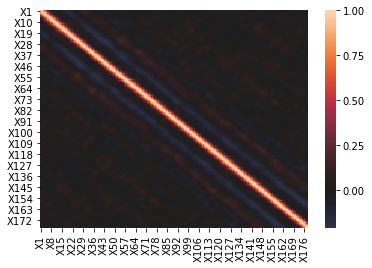

In [132]:
feat = df.loc[:, 'X1':'X178']

import seaborn as sns
sns.heatmap(feat.corr(), center=0);

Doesn't appear to have a great deal of multicollinearity within the model, PCA is likely superflous. Let's try SVC and XG BOOST TO see if it can surpass our random forest with grid search. 

In [133]:
from sklearn.svm import SVC
clf = SVC(kernel = 'rbf', random_state=0)
clf.fit(X_train, y_train)

C:\Users\xxtur\Anaconda3\envs\learn-env\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [134]:
sv_pred =clf.predict(X_test)
accuracy_score(y_test, sv_pred)

0.9718260869565217

In [135]:
print(confusion_matrix(y_test, sv_pred))
print(classification_report(y_test, sv_pred))

[[2295   23]
 [  58  499]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2318
           1       0.96      0.90      0.92       557

   micro avg       0.97      0.97      0.97      2875
   macro avg       0.97      0.94      0.95      2875
weighted avg       0.97      0.97      0.97      2875



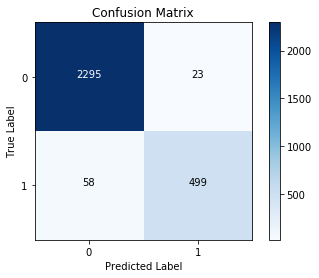

In [136]:
show_cf(y_test, sv_pred)

In [137]:
import xgboost as xgb

In [138]:
xg_clf = xgb.XGBClassifier()
xg_clf.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [139]:
xg_preds = xg_clf.predict(X_test)

In [140]:
print(accuracy_score(xg_preds, y_test))
print(confusion_matrix(y_test, xg_preds))
print(classification_report(y_test, xg_preds))

0.9662608695652174
[[2300   18]
 [  79  478]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2318
           1       0.96      0.86      0.91       557

   micro avg       0.97      0.97      0.97      2875
   macro avg       0.97      0.93      0.94      2875
weighted avg       0.97      0.97      0.97      2875



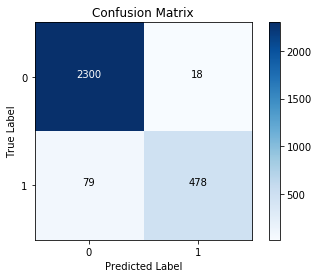

In [141]:
show_cf(y_test, xg_preds)

In [142]:
from sklearn.pipeline import Pipeline
pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('clf', LogisticRegression(random_state=42))])

pipe_svm = Pipeline([('scl', StandardScaler()),
                    ('clf', SVC(random_state=42))])

pipe_rf = Pipeline([('scl', StandardScaler()),
                    ('clf', RandomForestClassifier(random_state=42))])

pipe_xg = Pipeline([('scl', StandardScaler()),
                    ('clf', xgb.XGBClassifier(random_state=42))])



# List of pipelines for ease of iteration
pipelines = [pipe_lr, pipe_svm, pipe_rf, pipe_xg]

In [143]:
pipe_dict = {0: 'Logistic Regression', 1: 'Support Vector Machine', 2: 'Random Forest', 3: 'XGBoost'}

for pipe in pipelines:
    pipe.fit(X_train, y_train)

for idx, val in enumerate(pipelines):
    print((pipe_dict[idx], val.score(X_test, y_test)))

C:\Users\xxtur\Anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\xxtur\Anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


('Logistic Regression', 0.824695652173913)
('Support Vector Machine', 0.9714782608695652)
('Random Forest', 0.9714782608695652)
('XGBoost', 0.9662608695652174)


Just in case, we'll try a Pipeline that incorporates PCA to see if it brings us better results.

In [144]:
# Construct pipeline
pipe_rf = Pipeline([('pca', PCA(n_components=50)),
            ('clf', RandomForestClassifier(random_state = 123))])

# Set grid search params
param_grid_forest = [ 
  {'clf__n_estimators': [120],
   'clf__criterion': ['entropy', 'gini'], 
   'clf__max_depth': [4, 5, 6],  
   'clf__min_samples_leaf':[0.05 ,0.1, 0.2],  
   'clf__min_samples_split':[0.05 ,0.1, 0.2]
  }
]

# Construct grid search
gs_rf = GridSearchCV(estimator=pipe_rf,
            param_grid=param_grid_forest,
            scoring='accuracy',
            cv=3, verbose=2, return_train_score = True)

# Fit using grid search
gs_rf.fit(X_train, y_train)

# Best accuracy
print('Best accuracy: %.3f' % gs_rf.best_score_)

# Best params
print('\nBest params:\n', gs_rf.best_params_)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120, total=   1.9s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120, total=   1.9s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120, total=   1.9s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.1, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.1, clf__n_estimators=120, total=   1.9s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.1, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.1, clf__n_estimators=120, total=   1.9s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min

[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.1, clf__n_estimators=120, total=   2.2s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.2, clf__n_estimators=120, total=   2.3s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.2, clf__n_estimators=120, total=   2.2s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.2, clf__n_estimators=120, total=   2.2s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_sa

[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=0.05, clf__n_estimators=120, total=   1.6s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=0.05, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=0.05, clf__n_estimators=120, total=   1.6s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=0.05, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=0.05, clf__n_estimators=120, total=   1.6s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=0.1, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=0.1, clf__n_estimators=120, total=   1.5s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samp

[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.1, clf__min_samples_split=0.1, clf__n_estimators=120, total=   1.2s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.1, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.1, clf__min_samples_split=0.2, clf__n_estimators=120, total=   1.1s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.1, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.1, clf__min_samples_split=0.2, clf__n_estimators=120, total=   1.1s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.1, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.1, clf__min_samples_split=0.2, clf__n_estimators=120, total=   1.1s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.2, clf__min_sample

[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.7s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.05, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.7s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.1, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.7s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.1, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.7s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_sam

[CV]  clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.2, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.7s
[CV] clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.2, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.2, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.7s
[CV] clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.2, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.2, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.7s


[Parallel(n_jobs=1)]: Done 162 out of 162 | elapsed:  4.0min finished


Best accuracy: 0.940

Best params:
 {'clf__criterion': 'entropy', 'clf__max_depth': 6, 'clf__min_samples_leaf': 0.05, 'clf__min_samples_split': 0.2, 'clf__n_estimators': 120}


In [145]:
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'scl', 'clf', 'scl__copy', 'scl__with_mean', 'scl__with_std', 'clf__base_score', 'clf__booster', 'clf__colsample_bylevel', 'clf__colsample_bytree', 'clf__gamma', 'clf__learning_rate', 'clf__max_delta_step', 'clf__max_depth', 'clf__min_child_weight', 'clf__missing', 'clf__n_estimators', 'clf__n_jobs', 'clf__nthread', 'clf__objective', 'clf__random_state', 'clf__reg_alpha', 'clf__reg_lambda', 'clf__scale_pos_weight', 'clf__seed', 'clf__silent', 'clf__subsample'])

With our finalized model, let's look to make our machine a bit  more sensitive and tune the degree of certainty that our classifier needs to declare something a seizure. To play it safer, we want to identify as many seizures as possible so let's make a custom set of predictions that predicts a seizure even when the likelihood is much lower than 50%. 

In [80]:
rf_param_grid = {
    'n_estimators': [10,30,100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 6, 10],
    'min_samples_split': [5,10],
    'min_samples_leaf':[3,6]
}

In [117]:
import time
start = time.time()
rf_grid_search =GridSearchCV(forest, rf_param_grid, cv=3, scoring='precision')
rf_grid_search.fit(X_test, y_test)

print("Testing Accuracy: {:.4}%".format(rf_grid_search.best_score_ * 100))
print("Total Runtime for Grid Search on Random Forest Classifier: {:.4} seconds".format(time.time() - start))
print("")
print("Optimal Parameters: {}".format(rf_grid_search.best_params_))

Testing Accuracy: 98.59%
Total Runtime for Grid Search on Random Forest Classifier: 120.3 seconds

Optimal Parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 30}


In [118]:
grid_forest = RandomForestClassifier(criterion = 'gini', max_depth = None,min_samples_leaf=3, min_samples_split = 10, n_estimators=100)
grid_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [119]:
g_f_pred = grid_forest.predict(X_test)

In [120]:
print(accuracy_score(g_f_pred, y_test))
print(confusion_matrix(y_test, g_f_pred))
print(classification_report(y_test, g_f_pred))

0.9742608695652174
[[2288   30]
 [  44  513]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2318
           1       0.94      0.92      0.93       557

   micro avg       0.97      0.97      0.97      2875
   macro avg       0.96      0.95      0.96      2875
weighted avg       0.97      0.97      0.97      2875



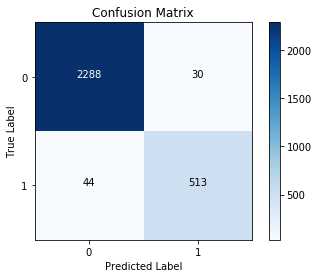

In [121]:
show_cf(y_test, g_f_pred)

In [146]:
grid_forest.predict_proba(X_test)

array([[0.04731782, 0.95268218],
       [0.988     , 0.012     ],
       [0.60618479, 0.39381521],
       ...,
       [0.09764001, 0.90235999],
       [0.84100142, 0.15899858],
       [0.75037474, 0.24962526]])

In [147]:
len(grid_forest.predict_proba(X_test))

2875

In [148]:
grid_forest.predict_proba(X_test)

array([[0.04731782, 0.95268218],
       [0.988     , 0.012     ],
       [0.60618479, 0.39381521],
       ...,
       [0.09764001, 0.90235999],
       [0.84100142, 0.15899858],
       [0.75037474, 0.24962526]])

In [150]:
len(g_f_pred)

2875

In [151]:
proba = grid_forest.predict_proba(X_test)

In [157]:
custom_pred = []
for i in range(0, len(g_f_pred)):
    if proba[i][1]>.2:
        custom_pred.append(1)
    else:
        custom_pred.append(0)


In [153]:
len(custom_pred)

2875

In [154]:
print(accuracy_score(custom_pred, y_test))
print(confusion_matrix(y_test, custom_pred))
print(classification_report(y_test, custom_pred))

0.9426086956521739
[[2158  160]
 [   5  552]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      2318
           1       0.78      0.99      0.87       557

   micro avg       0.94      0.94      0.94      2875
   macro avg       0.89      0.96      0.92      2875
weighted avg       0.95      0.94      0.95      2875



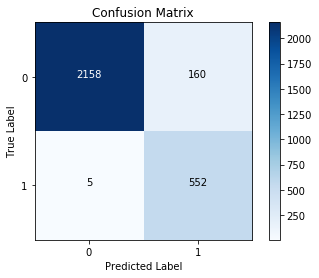

In [155]:
show_cf(y_test, custom_pred)

In [156]:
Put everything together at one spot
make a summary at the end
run grid search optimizing 

SyntaxError: invalid syntax (<ipython-input-156-25cf1ba2c364>, line 1)